In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create X and y
X = torch.linspace(-1, 1, 100).unsqueeze(-1)
y = 2*X**2 - 0.5*X + 1

# Standardize the values of y between 0 and 1
y_min = y.min()
y_max = y.max()
y = (y - y_min) / (y_max - y_min)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2, random_state=42)



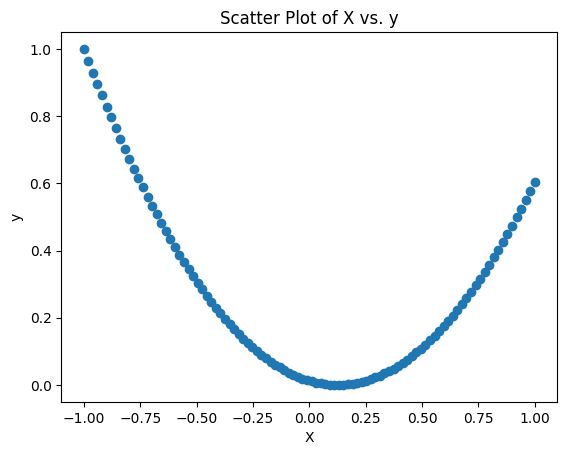

In [ ]:
# Plot the points from the data
plt.scatter(X.numpy(), y.numpy())
plt.title('Scatter Plot of X vs. y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
# Write a simple neural netweork with:
# - input size: 1
# - output size: 1
# - add as many hidden layers as you want
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            ___
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
# Function to apply weight initialization
def initialize_weights(model, method):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            if method == "xavier":
                nn.init.xavier_uniform_(m.weight)
            elif method == "he":
                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
            elif method == "normal":
                nn.init.normal_(m.weight, mean=0.0, std=0.02)
            elif method == "uniform":
                nn.init.uniform_(m.weight, a=-0.1, b=0.1)
            elif method == "zero":
                nn.init.uniform_(m.weight, a=-0.0, b=0.0)
                nn.init.uniform_(m.bias, a=-0.0, b=0.0)
            elif method == "default":
                pass # PyTorch default initialization

In [ ]:
def train(model, criterion, optimizer, epochs=200):
    model.train()
    train_losses = []
    for epoch in range(epochs):

        predictions = model(X_train)
        loss = criterion(predictions, y_train)

        optimizer.___()
        loss.___()
        optimizer.___()


        train_losses.append(loss.item())
    return train_losses

In [ ]:
def evaluate(model):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        loss = nn.MSELoss()(predictions, y_test)
    return loss.item()

In [ ]:
init_methods = ["default", "xavier", "he", "normal", "uniform", "zero"]
# init_methods = ["zero"]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Create X and y
X = torch.linspace(-1, 1, 100).unsqueeze(-1)
y = 2*X**2 - 0.5*X + 1

# Standardize the values of y between 0 and 1
y_min = y.min()
y_max = y.max()
y = (y - y_min) / (y_max - y_min)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)  # unsqueeze to match dimensions
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1)  # unsqueeze to match dimensions



# Write a simple neural netweork with:
# - input size: 1
# - output size: 1
# - add as many hidden layers as you want
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 64), # Input layer with 1 input and 64 hidden units
            nn.ReLU(),        # Activation function
            nn.Linear(64, 32),# Hidden layer with 64 inputs and 32 hidden units
            nn.ReLU(),       # Activation function
            nn.Linear(32, 1)  # Output layer with 32 inputs and 1 output
        )

    def forward(self, x):
        return self.layers(x)

# Function to apply weight initialization
def initialize_weights(model, method):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            if method == "xavier":
                nn.init.xavier_uniform_(m.weight)
            elif method == "he":
                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
            elif method == "normal":
                nn.init.normal_(m.weight, mean=0.0, std=0.02)
            elif method == "uniform":
                nn.init.uniform_(m.weight, a=-0.1, b=0.1)
            elif method == "zero":
                nn.init.uniform_(m.weight, a=-0.0, b=0.0)
                nn.init.uniform_(m.bias, a=-0.0, b=0.0)
            elif method == "default":
                pass # PyTorch default initialization


def train(model, criterion, optimizer, epochs=200):
    model.train()
    train_losses = []
    for epoch in range(epochs):

        predictions = model(X_train)
        loss = criterion(predictions, y_train)

        optimizer.zero_grad() # Reset gradients
        loss.backward()       # Calculate gradients
        optimizer.step()      # Update weights

        train_losses.append(loss.item())
    return train_losses


def evaluate(model):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        loss = nn.MSELoss()(predictions, y_test)
    return loss.item()


init_methods = ["default", "xavier", "he", "normal", "uniform", "zero"]
# init_methods = ["zero"]


results = {}

for method in init_methods:
    print(f"Training with {method} initialization")
    model = SimpleNN()
    initialize_weights(model, method)

    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    train_losses = train(model, criterion, optimizer)
    test_loss = evaluate(model)

    results[method] = {
        "train_losses": train_losses,
        "test_loss": test_loss
    }

    print(f"Test Loss ({method}): {test_loss:.4f}\n")

Training with default initialization


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([80, 1, 1])) that is different to the input size (torch.Size([80, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([20, 1, 1])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test Loss (default): 0.0778

Training with xavier initialization
Test Loss (xavier): 0.0778

Training with he initialization
Test Loss (he): 0.0778

Training with normal initialization
Test Loss (normal): 0.0778

Training with uniform initialization
Test Loss (uniform): 0.0778

Training with zero initialization
Test Loss (zero): 0.0778



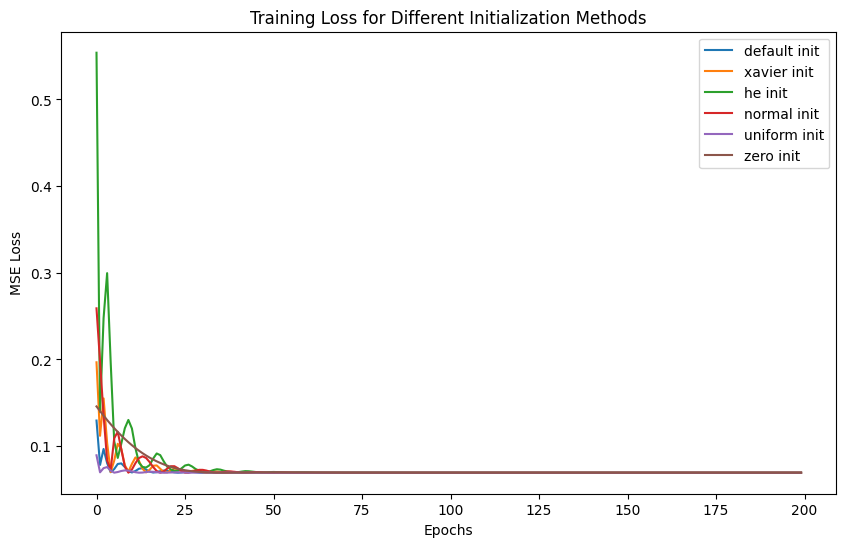

In [ ]:
plt.figure(figsize=(10, 6))
for method in init_methods:
    plt.plot(results[method]["train_losses"], label=f"{method} init")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss for Different Initialization Methods")
plt.legend()
plt.show()